**Inversión ambiental Municipios del Cauca 2020**

 Detalles sobre el monto de inversión, los proyectos específicos, y otros datos relevantes que las entidades de control han recopilado para evaluar y seguir el uso de los fondos destinados a la protección del medio ambiente en la ciudad de Popayàn.


In [3]:
#Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [4]:
#cargamos api
url = "https://www.datos.gov.co/resource/tkyr-nytg.json"
data = pd.read_json(url)


In [5]:
#primeras filas del DataFrame
data.head()


,municipio,total_gasto_2020_definitivo,comprometido,inversion_ambiental_2020,comprometido_1,definitivo,comprometido_2
0,Piamonte,17928064339,14573897299,3474763873,3024463903,19.38,20.75
1,Almaguer,28446525770,23503991061,4716594256,3295372714,16.58,14.02
2,Santa Rosa,12157080578,9291132310,2091154912,1272861704,17.20,13.70
3,López de Micay,22553190398,19672341032,2874294760,2644523831,12.74,13.44
4,Timbiquí,30258194558,18165286469,3114697330,2410192990,10.29,13.27


In [7]:
# Revisar las columnas del DataFrame
data.columns

# Comprobar valores nulos
data.isnull().sum()

# Convertir las columnas numéricas a tipo numérico
numeric_columns = [
    'total_gasto_2020_definitivo',
    'comprometido',
    'inversion_ambiental_2020',
    'comprometido_1',
    'definitivo',
    'comprometido_2'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Comprobar si hay valores no válidos después de la conversión
data.isnull().sum()


municipio                      0
total_gasto_2020_definitivo    0
comprometido                   0
inversion_ambiental_2020       0
comprometido_1                 0
definitivo                     0
comprometido_2                 0
dtype: int64

**Gasto total por municipio**

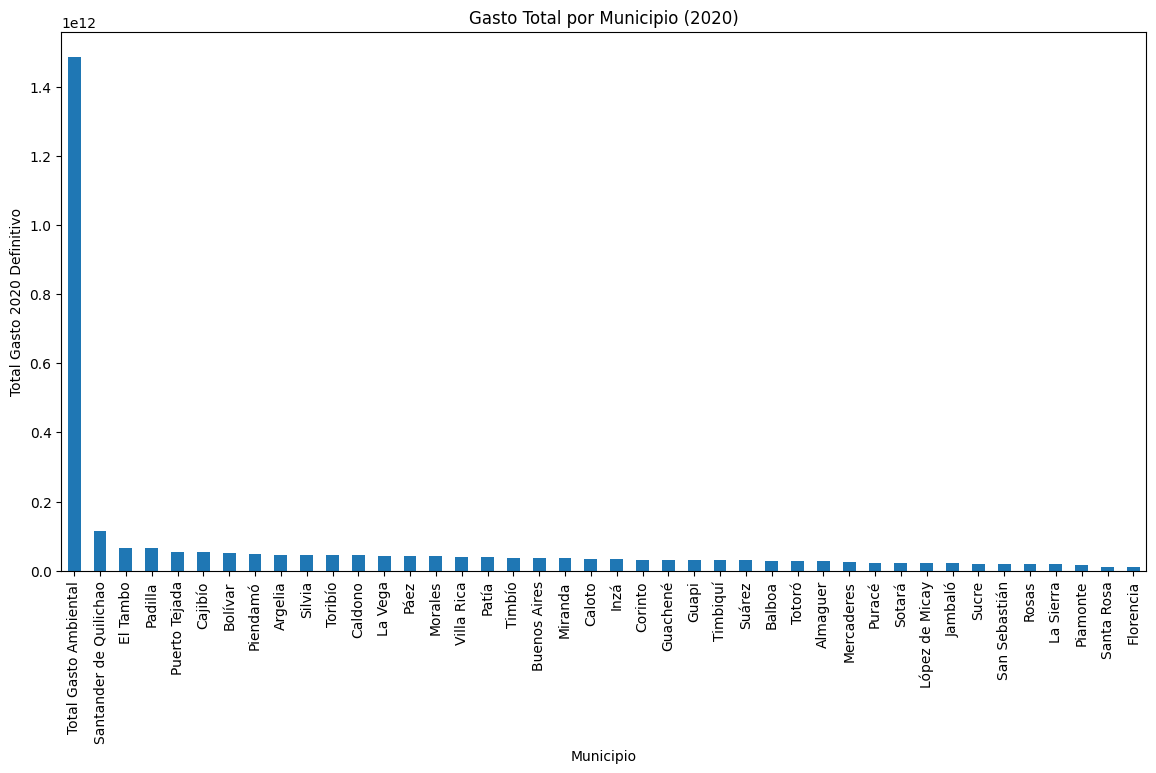

In [8]:
gasto_por_municipio = data.groupby('municipio')['total_gasto_2020_definitivo'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
gasto_por_municipio.plot(kind='bar')
plt.title('Gasto Total por Municipio (2020)')
plt.xlabel('Municipio')
plt.ylabel('Total Gasto 2020 Definitivo')
plt.xticks(rotation=90)
plt.show()


**Comparar la inversión ambiental en 2020 con el gasto total por municipio.**

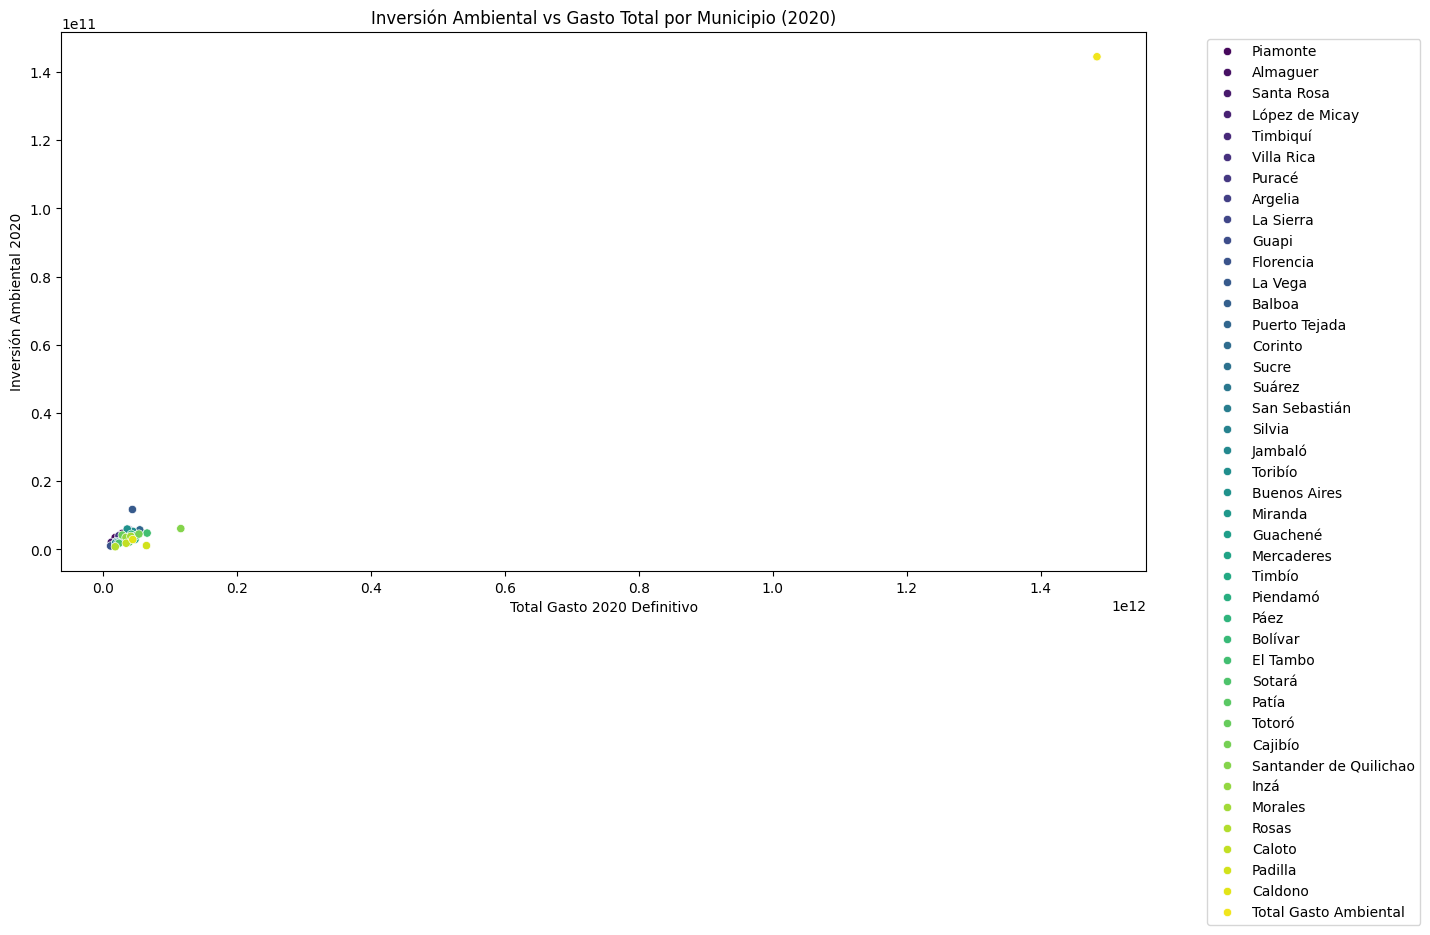

In [9]:
inversion_vs_gasto = data[['municipio', 'total_gasto_2020_definitivo', 'inversion_ambiental_2020']]

plt.figure(figsize=(14, 7))
sns.scatterplot(data=inversion_vs_gasto, x='total_gasto_2020_definitivo', y='inversion_ambiental_2020', hue='municipio', palette='viridis')
plt.title('Inversión Ambiental vs Gasto Total por Municipio (2020)')
plt.xlabel('Total Gasto 2020 Definitivo')
plt.ylabel('Inversión Ambiental 2020')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


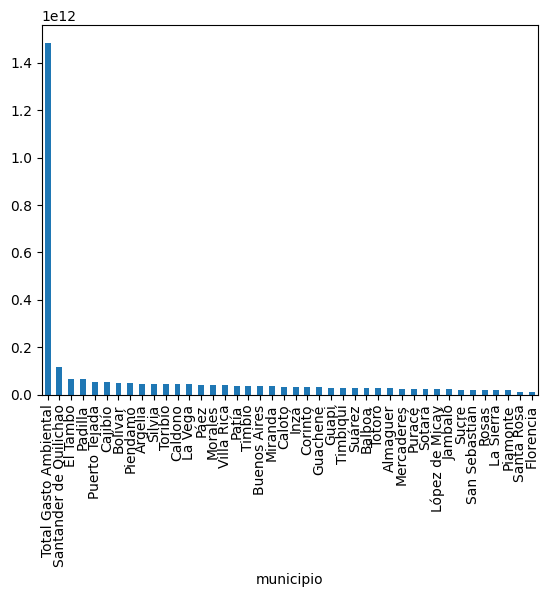

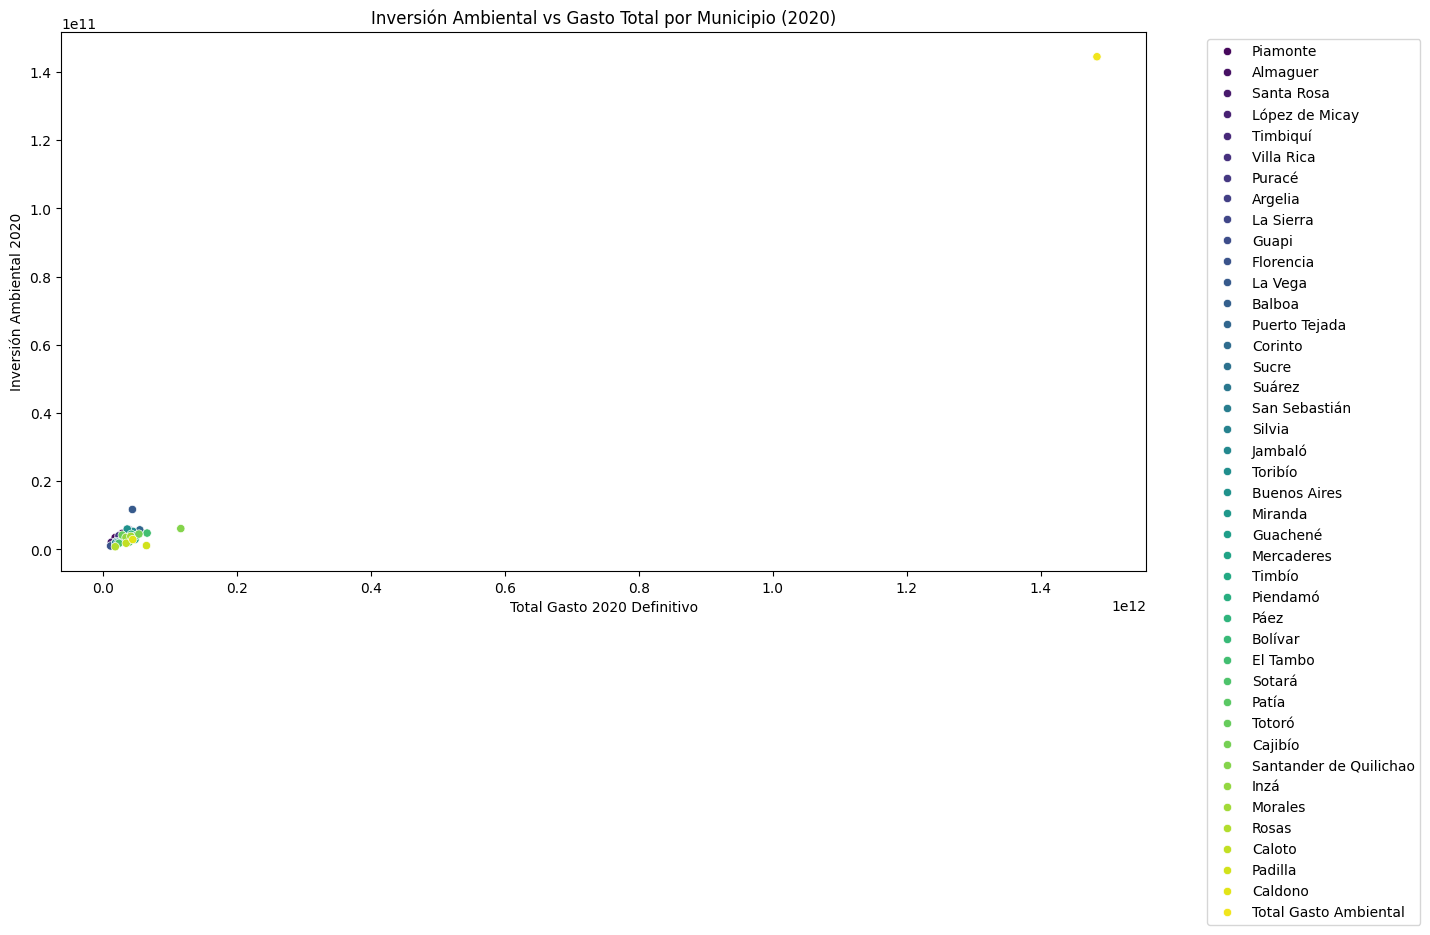

In [10]:
# Guardar visualización de gasto por municipio
gasto_por_municipio.plot(kind='bar').get_figure().savefig('gasto_por_municipio.png')

# Guardar visualización de inversión ambiental vs gasto total
plt.figure(figsize=(14, 7))
sns.scatterplot(data=inversion_vs_gasto, x='total_gasto_2020_definitivo', y='inversion_ambiental_2020', hue='municipio', palette='viridis')
plt.title('Inversión Ambiental vs Gasto Total por Municipio (2020)')
plt.xlabel('Total Gasto 2020 Definitivo')
plt.ylabel('Inversión Ambiental 2020')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('inversion_vs_gasto.png')
plt.show()


**Distribución de Gasto e Inversión Ambiental**





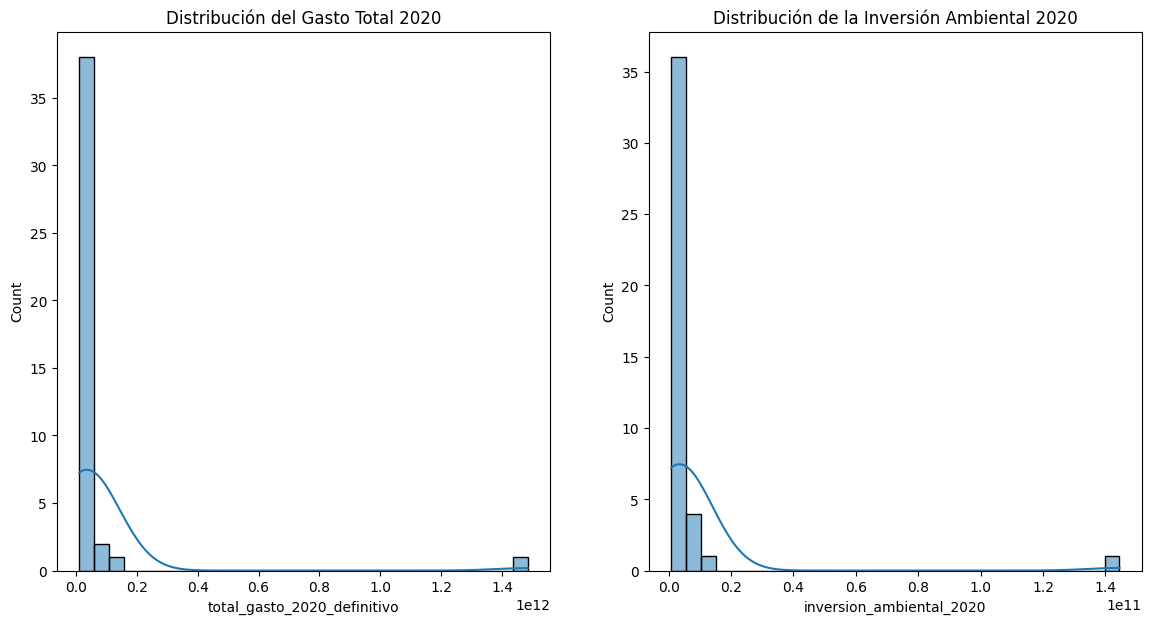

In [11]:
plt.figure(figsize=(14, 7))

# Distribución del gasto total
plt.subplot(1, 2, 1)
sns.histplot(data['total_gasto_2020_definitivo'].dropna(), kde=True, bins=30)
plt.title('Distribución del Gasto Total 2020')

# Distribución de la inversión ambiental
plt.subplot(1, 2, 2)
sns.histplot(data['inversion_ambiental_2020'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Inversión Ambiental 2020')

plt.show()


**Municipios con Mayor Inversión Ambiental**

<ipython-input-12-e670a82c5503>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=municipios_alta_inversion, x='municipio', y='proporcion_inversion_ambiental', palette='viridis')


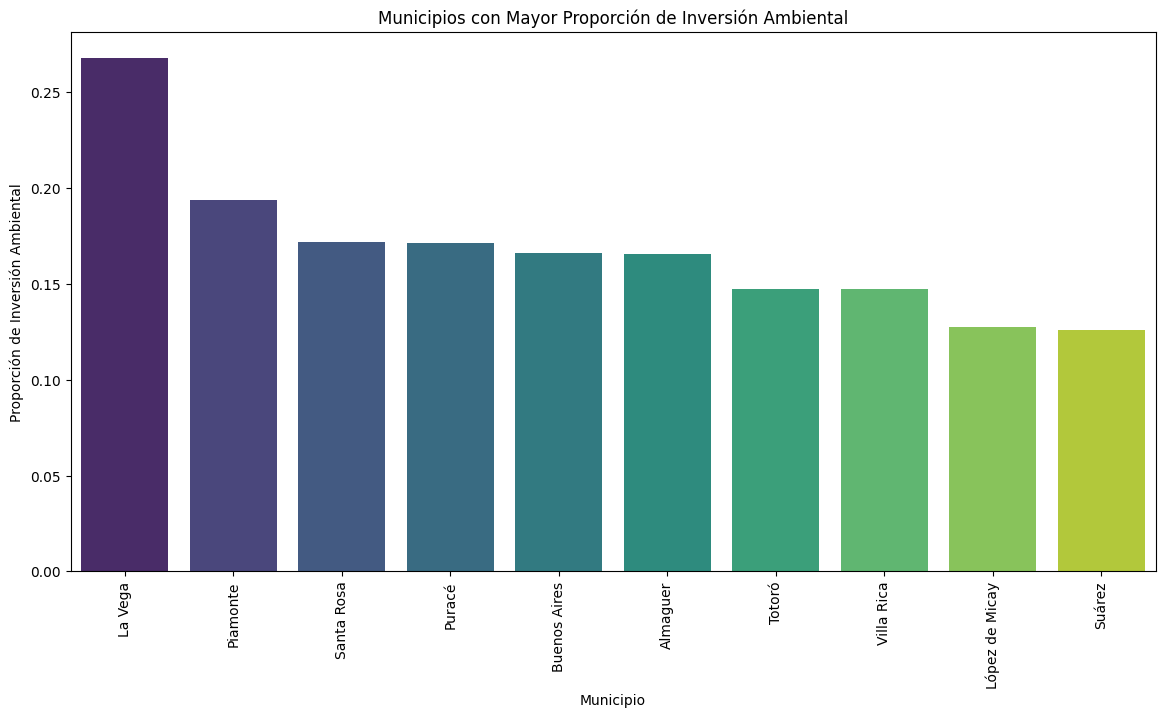

In [12]:
# Crear una nueva columna para la proporción de inversión ambiental
data['proporcion_inversion_ambiental'] = data['inversion_ambiental_2020'] / data['total_gasto_2020_definitivo']

# Filtrar los municipios con mayor proporción de inversión ambiental
municipios_alta_inversion = data.sort_values(by='proporcion_inversion_ambiental', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=municipios_alta_inversion, x='municipio', y='proporcion_inversion_ambiental', palette='viridis')
plt.title('Municipios con Mayor Proporción de Inversión Ambiental')
plt.xlabel('Municipio')
plt.ylabel('Proporción de Inversión Ambiental')
plt.xticks(rotation=90)
plt.show()


**Modelo de redes neuronales para predecir el gasto total o la inversión ambiental utilizando TensorFlow y Keras.**

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
url = "https://www.datos.gov.co/resource/tkyr-nytg.json"
data = pd.read_json(url)

# Seleccionar características y objetivo
features = ['total_gasto_2020_definitivo', 'comprometido', 'inversion_ambiental_2020']
target = 'definitivo'

# Eliminar filas con valores nulos
data = data.dropna(subset=features + [target])

# Dividir datos en características (X) y objetivo (y)
X = data[features].values
y = data[target].values

# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construir el modelo de regresión neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Loss en conjunto de prueba:", loss)


Epoch 1/50
1/1 [==============================] - 1s 825ms/step - loss: 160.4639 - val_loss: 82.5384
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 159.9490 - val_loss: 82.2530
Epoch 3/50
1/1 [==============================] - 0s 30ms/step - loss: 159.4262 - val_loss: 81.9681
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 158.8982 - val_loss: 81.6858
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 158.3725 - val_loss: 81.4061
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 157.8462 - val_loss: 81.1269
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 157.3228 - val_loss: 80.8485
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 156.7980 - val_loss: 80.5703
Epoch 9/50
1/1 [==============================] - 0s 29ms/step - loss: 156.2763 - val_loss: 80.2902
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 155.7511 - val_loss: 80.006